In [1]:
# Hello Viewer
# I'm a beginner in Data Science and looking forward to some valuable feedback.
# Please drop any suggestion or feedback you have in the comments.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-of-zurich/zuordnungstabellehunderassehundetyp.csv
/kaggle/input/dogs-of-zurich/20160307hundehalter.csv
/kaggle/input/dogs-of-zurich/20151001hundehalter.csv
/kaggle/input/dogs-of-zurich/20170308hundehalter.csv


In [3]:
df = pd.read_csv('/kaggle/input/dogs-of-zurich/20170308hundehalter.csv')

In [4]:
df = df.rename(columns={'ALTER': 'Age','GESCHLECHT':'Gender',
                        'STADTKREIS': 'District','RASSE1': 'Primary Breed',
                        'RASSE2':'Secondary Breed','GEBURTSJAHR_HUND': 'Year of Birth',
                        'GESCHLECHT_HUND': 'Dog Gender','HUNDEFARBE':'Color',
                        'RASSENTYP':'Breed Type', 'HALTER_ID':'Holder_id'
                       })

# TYPES OF COLUMNS

In [5]:
df.dtypes

Holder_id             int64
Age                  object
Gender               object
District            float64
STADTQUARTIER       float64
Primary Breed        object
RASSE1_MISCHLING     object
Secondary Breed      object
RASSE2_MISCHLING    float64
Breed Type           object
Year of Birth         int64
Dog Gender           object
Color                object
dtype: object

In [6]:
df.dropna(axis=1, how='all', inplace=True)
df.drop(columns=['Secondary Breed', 'RASSE1_MISCHLING'], inplace=True)
df = df[df.Age.notnull()]

In [7]:
df

,Holder_id,Age,Gender,District,STADTQUARTIER,Primary Breed,Breed Type,Year of Birth,Dog Gender,Color
0,126,61-70,m,9.0,92.0,Welsh Terrier,K,2011,w,schwarz/braun
1,171,61-70,m,3.0,31.0,Berner Sennenhund,I,2009,m,tricolor
2,574,61-70,w,2.0,23.0,Mischling gross,I,2013,w,schwarz
3,695,41-50,m,6.0,63.0,Labrador Retriever,I,2012,w,braun
4,893,61-70,w,7.0,71.0,Mittelschnauzer,I,2010,w,schwarz
...,...,...,...,...,...,...,...,...,...,...
7150,135718,31-40,m,9.0,91.0,Mischling gross,I,2015,w,golden
7151,135725,31-40,w,7.0,74.0,Boxer,I,2016,w,gelb/weiss
7152,135726,11-20,w,11.0,111.0,Pinscher,K,2016,w,schwarz
7153,135728,31-40,w,7.0,72.0,Whippet,I,2016,w,vierfarbig


In [8]:
label = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','91-100']
x = np.arange(len(label))
width = 0.35
# df.Age.unique()

In [9]:
men, women = [], []
for age in label:
    men.append(len(df[(df.Gender == 'm') & (df.Age == age)]))
    women.append(len(df[(df.Gender == 'w') & (df.Age == age)]))
    
print(men)
print(women)

[9, 181, 434, 495, 456, 342, 219, 56, 4]
[36, 608, 949, 994, 1091, 699, 454, 116, 11]


# Ownership Distribution Based on Gender in Different Age Groups

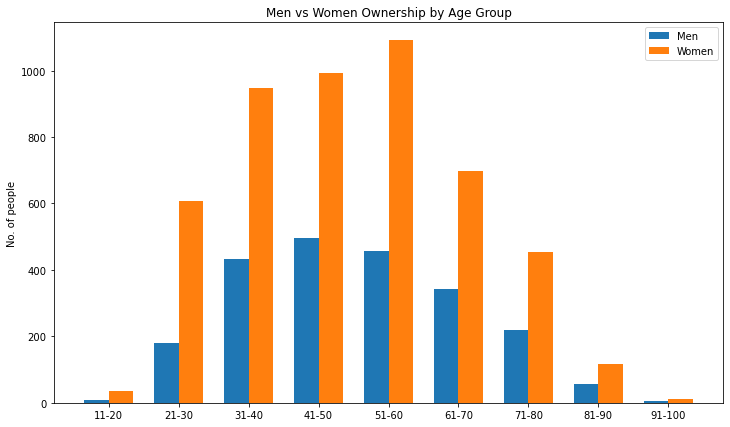

In [10]:
fig,ax = plt.subplots(figsize=(12,7))
rec = ax.bar(x-width/2, men, width, label='Men')
rect = ax.bar(x+width/2, women, width, label='Women')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.set_ylabel('No. of people')
ax.set_title('Men vs Women Ownership by Age Group')
ax.legend()

In [11]:
df['Breed Type'].unique()

array(['K', 'I', 'II'], dtype=object)

In [12]:
t1, t2, t3 = [], [], []
for age in label:
    t1.append(len(df[(df['Breed Type'] == 'K') & (df.Age == age)]))
    t2.append(len(df[(df['Breed Type'] == 'I') & (df.Age == age)]))
    t3.append(len(df[(df['Breed Type'] == 'II') & (df.Age == age)]))
print(t1)
print(t2)
print(t3)

[31, 532, 833, 943, 925, 670, 434, 126, 10]
[14, 255, 547, 540, 618, 369, 238, 46, 5]
[0, 2, 3, 6, 4, 2, 1, 0, 0]


# TYPE OF BREED OWNERSHIP DISTRIBUTION BY AGE GROUPS

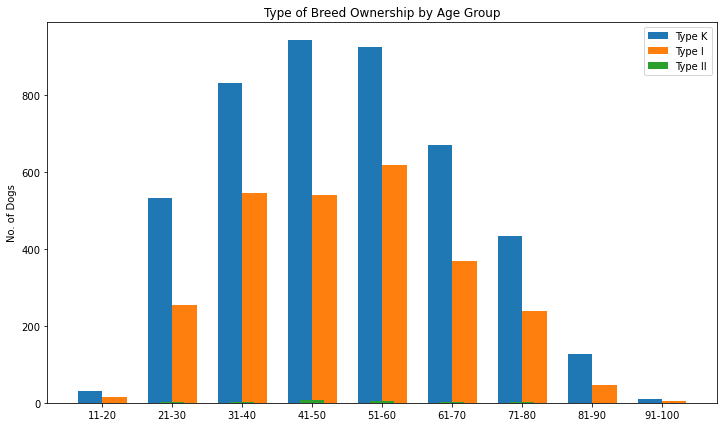

In [13]:
fig1,ax1 = plt.subplots(figsize=(12,7))
rec = ax1.bar(x-width/2, t1, width, label='Type K')
rect = ax1.bar(x+width/2, t2, width, label='Type I')
rects = ax1.bar(x, t3, width, label='Type II')
ax1.set_xticks(x)
ax1.set_xticklabels(label)
ax1.set_ylabel('No. of Dogs')
ax1.set_title('Type of Breed Ownership by Age Group')
ax1.legend()

In [14]:
df.District.unique()

array([ 9.,  3.,  2.,  6.,  7., 10., 11.,  8.,  5.,  4., 12.,  1.])

In [15]:
type_k = df[df['Breed Type'] == 'II']
type_k.Color.unique()

array(['mahagoni/weiss', 'gestromt', 'schwarz', 'beige/weiss',
       'braun/schwarz', 'schwarz gestromt', 'braun/schwarz/weiss',
       'braun', 'braun/weiss', 'wildfarbig', 'weiss', 'beige/braun'],
      dtype=object)

In [16]:
colors = ['schwarz', 'blue', 'braun', 'wildfarbig', 'weiss', 'orange']
y = np.arange(len(colors))


In [17]:
d1, d2, d3 = [], [], []
for c in colors:
    d1.append(len(df[(df['Breed Type'] == 'K') & (df.Color == c)]))
    d2.append(len(df[(df['Breed Type'] == 'I') & (df.Color == c)]))
    d3.append(len(df[(df['Breed Type'] == 'II') & (df.Color == c)]))
    
print(d1,d2,d3)
    

[367, 4, 318, 5, 488, 27] [405, 2, 216, 4, 92, 4] [4, 0, 2, 1, 1, 0]


# SELECTED COLOR DISTRIBUTION AMONG BREED TYPE

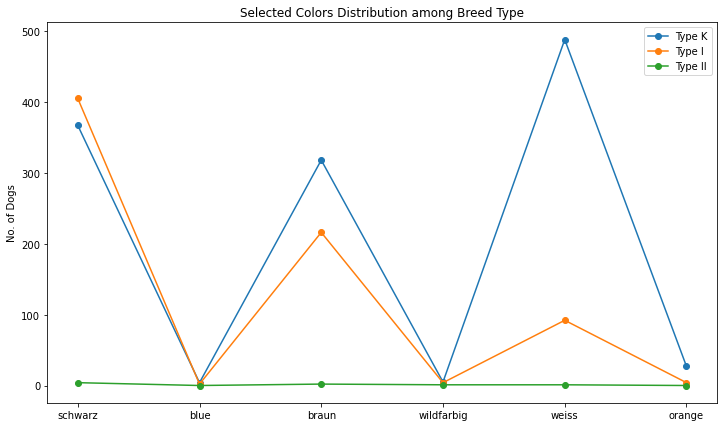

In [18]:
fig2, ax2 = plt.subplots(figsize=(12,7))
type_one = ax2.plot(y, d1, '-o', label='Type K')
type_two = ax2.plot(y, d2, '-o', label='Type I')
type_three = ax2.plot(y, d3, '-o', label='Type II')
ax2.set_xticks(y)
ax2.set_xticklabels(colors)
ax2.set_ylabel('No. of Dogs')
ax2.set_title('Selected Colors Distribution among Breed Type')
ax2.legend()